In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import numpy as np
import argparse
import math
import sys
import pandas as pd

In [2]:
out_dir = "/home/luca/SDCC/kademlia-nft/plots"
os.makedirs(out_dir, exist_ok=True)

In [4]:
from pathlib import Path
base = Path("SDCC/kademlia-nft/data")
prefix = "node"
start, end = 2, 105

nfile=[]
for t in range(start, end + 1):
    folder = base / f"{prefix}{t}"    # togli "/node" se non serve
    n_json = sum(1 for _ in folder.rglob("*.json")) if folder.exists() else 0
    nfile.append(n_json)
    print(f"{folder}: {n_json} file .json")



ct = 0
for t in nfile:
    if t == 0:
        ct += 1
if ct > 0:
    del nfile[-ct:] 
print(nfile)

print("la somma è:", sum(nfile))

plot_istogramma(nfile)

SDCC/kademlia-nft/data/node2: 41 file .json
SDCC/kademlia-nft/data/node3: 13 file .json
SDCC/kademlia-nft/data/node4: 31 file .json
SDCC/kademlia-nft/data/node5: 21 file .json
SDCC/kademlia-nft/data/node6: 23 file .json
SDCC/kademlia-nft/data/node7: 14 file .json
SDCC/kademlia-nft/data/node8: 21 file .json
SDCC/kademlia-nft/data/node9: 14 file .json
SDCC/kademlia-nft/data/node10: 27 file .json
SDCC/kademlia-nft/data/node11: 13 file .json
SDCC/kademlia-nft/data/node12: 11 file .json
SDCC/kademlia-nft/data/node13: 21 file .json
SDCC/kademlia-nft/data/node14: 9 file .json
SDCC/kademlia-nft/data/node15: 10 file .json
SDCC/kademlia-nft/data/node16: 33 file .json
SDCC/kademlia-nft/data/node17: 10 file .json
SDCC/kademlia-nft/data/node18: 19 file .json
SDCC/kademlia-nft/data/node19: 21 file .json
SDCC/kademlia-nft/data/node20: 18 file .json
SDCC/kademlia-nft/data/node21: 13 file .json
SDCC/kademlia-nft/data/node22: 13 file .json
SDCC/kademlia-nft/data/node23: 23 file .json
SDCC/kademlia-nft/d

'/home/luca/plots/grafico2.png'

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_istogramma(
    vec,
    title="Frequenza delle risorse per ciascun nodo con replicazione=3",
    xlabel="Nodi ",
    ylabel="Frequenza",
    name="grafico2.png",
    out_dir="plots",
    x_start_label=2,
    x_range=None,
    show=False
):
    # 1) Prepara cartella e path
    os.makedirs(out_dir, exist_ok=True)
    out_path = os.path.abspath(os.path.join(out_dir, name))

    # 2) Prepara dati (posizioni e etichette)
    n = len(vec)
    positions = np.arange(n)
    labels = np.arange(x_start_label, x_start_label + n)

    # 3) Plot
    sns.set_theme(style="whitegrid")
    fig, ax = plt.subplots()

    # Imposta una larghezza < 1 per creare spazio tra le barre (0.75 = 25% di gap)
    bar_width = 0.75
    sns.barplot(
        x=positions,
        y=vec,
        ax=ax,
        errorbar=None,
        width=bar_width,           # <-- spazio tra barre
        edgecolor="black",
        linewidth=0.7
    )

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(positions)
    ax.set_xticklabels(labels)

    if x_range is not None:
        left_label, right_label = x_range
        left_pos  = left_label - x_start_label - 0.5
        right_pos = right_label - x_start_label + 0.5
        ax.set_xlim(left_pos, right_pos)
    else:
        ax.set_xlim(-0.5, n - 0.5)

    fig.tight_layout()

    # 4) Salva PRIMA di mostrare
    fig.savefig(out_path, dpi=300, bbox_inches="tight")

    # 5) Verifica
    if not os.path.exists(out_path):
        print(f"⚠️ Non trovato dopo il salvataggio: {out_path}")
    else:
        print(f"✅ Salvato in: {out_path}")

    if show:
        plt.show()
    plt.close(fig)

    return out_path


In [7]:
df = pd.read_csv("/home/luca/SDCC/kademlia-nft/results/results.csv")

In [8]:
def plot_avg_with_std(df, out_path: str | None):
    x = df["N"].values
    y = df["avg"].values
    s = df["std"].values
    y_low = y - s
    y_high = y + s

    plt.figure(figsize=(8, 5))
    plt.plot(x, y, marker="o", label="media (avg)")
    plt.fill_between(x, y_low, y_high, alpha=0.2, label="banda(std)")
    plt.xlabel("N (numero di nodi)")
    plt.ylabel("Frequenza media per nodo (avg)")
    plt.title("Distribuzione degli NFT al variare dei nodi (K=3)")
    plt.legend()
    plt.grid(True, linestyle="--", linewidth=0.5)
    plt.tight_layout()

    if out_path:
        plt.savefig(out_path, dpi=140, bbox_inches="tight")
        print(f"✅ Plot salvato in: {out_path}")
    else:
        plt.show()

In [6]:
plot_avg_with_std(df,"/home/luca/SDCC/kademlia-nft/plots/avg.png")

NameError: name 'df' is not defined

In [4]:
df = pd.read_csv("/home/luca/SDCC/kademlia-nft/results/lookup.csv")

In [68]:
hops_series = df.iloc[:, 2]
count = 0
count2 = 0
acc = 0


for t in hops_series:
    if t == -1:
        count += 1
    else:
        acc += t
        count2 += 1

print("Totale NFT cercati:", len(hops_series))
print("Numero di NFT non trovati:", count)
mean = acc / count2 if count2 > 0 else 0
print("La media degli HOP fatti è:", mean)
print("Sono stati trovati:", count2)
print("Max Hops:", hops_series.max())


Totale NFT cercati: 591
Numero di NFT non trovati: 1
La media degli HOP fatti è: 5.101694915254237
Sono stati trovati: 590
Max Hops: 16


In [7]:
nRuns= pd.read_csv("/home/luca/SDCC/kademlia-nft/results/nRuns.csv")

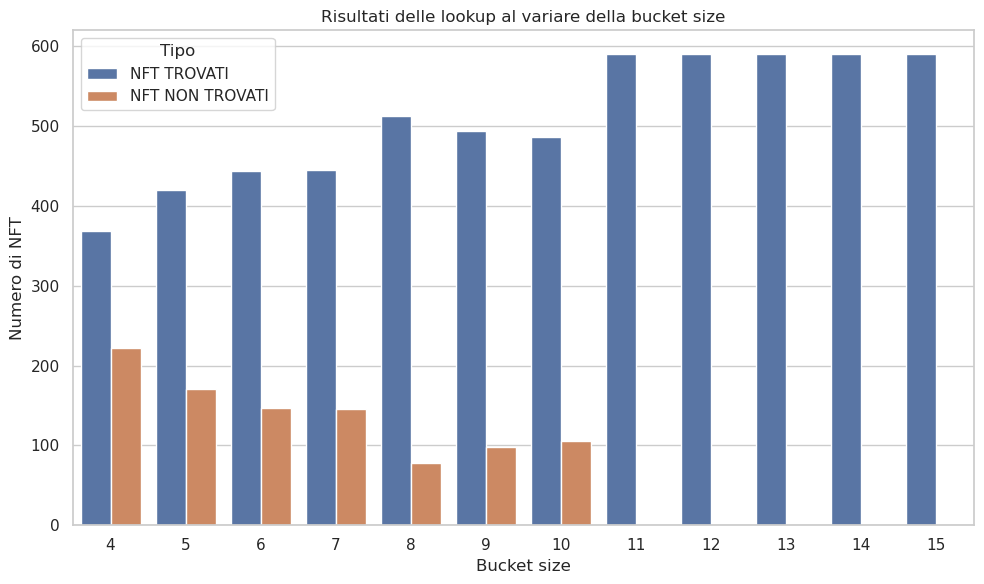

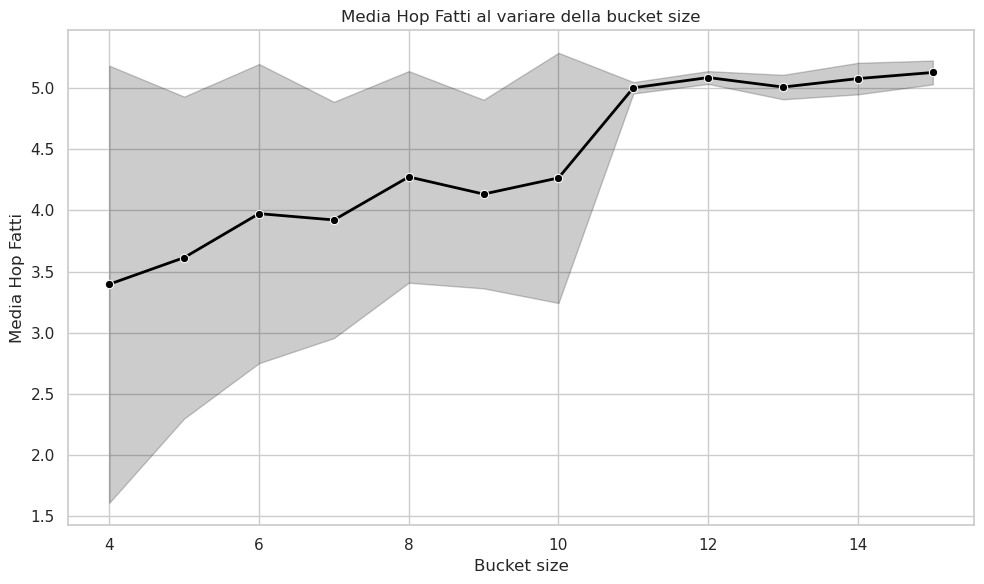

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_kbucket_results(df: pd.DataFrame, title1: str, title2: str):
   
    sns.set_theme(style="whitegrid")

    # --- Grafico 1: NFT trovati / non trovati ---
    df_melted = df.melt(
        id_vars="BUCKETSIZE",
        value_vars=["NFT TROVATI", "NFT NON TROVATI"],
        var_name="Tipo",
        value_name="Numero"
    )

    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df_melted,
        x="BUCKETSIZE",
        y="Numero",
        hue="Tipo",
        errorbar=None
    )
    plt.title(title1)
    plt.xlabel("Bucket size")
    plt.ylabel("Numero di NFT")
    plt.legend(title="Tipo")
    plt.tight_layout()
    plt.show()

    # --- Grafico 2: Media hop ---
    plt.figure(figsize=(10, 6))
    sns.lineplot(
        data=df,
        x="BUCKETSIZE",
        y="MEDIA HOP FATTI",
        marker="o",
        linewidth=2,
        color="black"
    )
    plt.title(title2)
    plt.xlabel("Bucket size")
    plt.ylabel("Media Hop Fatti")
    plt.tight_layout()
    plt.show()


plot_kbucket_results(nRuns, "Risultati delle lookup al variare della bucket size", "Media Hop Fatti al variare della bucket size")

In [9]:
nHops= pd.read_csv("/home/luca/SDCC/kademlia-nft/results/nodiPlus.csv")

✅ Plot salvato in: variareNodi.png


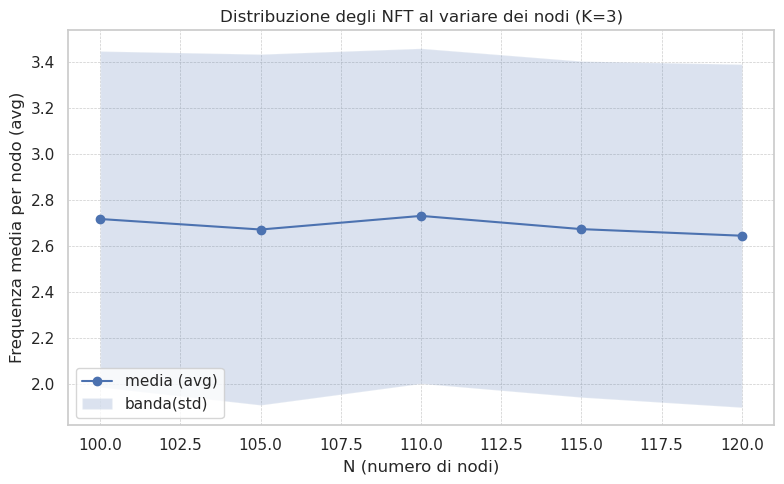

In [10]:
def plot_hops_Nodis(df, out_path: str | None):
    x = df["numero_nodi"].values
    y = df["nHops_medio"].values
    s = df["stdHops"].values
    y_low = y - s
    y_high = y + s

    plt.figure(figsize=(8, 5))
    plt.plot(x, y, marker="o", label="media (avg)")
    plt.fill_between(x, y_low, y_high, alpha=0.2, label="banda(std)")
    plt.xlabel("N (numero di nodi)")
    plt.ylabel("Frequenza media per nodo (avg)")
    plt.title("Distribuzione degli NFT al variare dei nodi (K=3)")
    plt.legend()
    plt.grid(True, linestyle="--", linewidth=0.5)
    plt.tight_layout()

    if out_path:
        plt.savefig(out_path, dpi=140, bbox_inches="tight")
        print(f"✅ Plot salvato in: {out_path}")
    else:
        plt.show()

plot_hops_Nodis(nHops,"variareNodi.png")

In [40]:
import os
import hashlib
import pandas as pd
from collections import defaultdict

# --- Parametri fissi richiesti ---
CSV_PATH = "/home/luca/SDCC/kademlia-nft/csv/NFT_Top_Collections.csv"
COLUMN_INDEX = 1                 # colonna con il nome NFT (0-based); nel tuo CSV è la 1: "Name"
BASE_DIR = "/home/luca/SDCC/kademlia-nft/data"
MIN_REPLICAS = 3

def sha1_hex(s: str) -> str:
    return hashlib.sha1(s.encode("utf-8")).hexdigest().lower()

def build_filename_index(base_dir: str) -> dict[str, list[str]]:
    """Indicizza tutti i file *.json come {sha1hex: [percorsi]} scansionando ricorsivamente base_dir."""
    idx = defaultdict(list)
    for root, _, files in os.walk(base_dir):
        for fn in files:
            if fn.lower().endswith(".json"):
                key = fn[:-5].lower()  # rimuove ".json"
                idx[key].append(os.path.join(root, fn))
    return idx

# 1) Leggi i nomi dal CSV
df_src = pd.read_csv(CSV_PATH)
if COLUMN_INDEX < 0 or COLUMN_INDEX >= df_src.shape[1]:
    raise IndexError(f"COLUMN_INDEX={COLUMN_INDEX} fuori range. Il CSV ha {df_src.shape[1]} colonne.")
names_series = df_src.iloc[:, COLUMN_INDEX].astype(str).str.strip()
names = [n for n in names_series if n != "" and n.lower() != "nan"]

# 2) Indicizza tutti i file presenti in /data
index_map = build_filename_index(BASE_DIR)

# 3) Verifica repliche per ogni nome
rows = []
for name in names:
    key = sha1_hex(name)
    paths = index_map.get(key, [])
    rows.append({
        "name": name,
        "sha1_hex": key,
        "replica_count": len(paths),
        "ok": len(paths) >= MIN_REPLICAS,
        "paths": " | ".join(paths) if paths else ""
    })

df = pd.DataFrame(rows)

# 4) Ordina: prima gli insufficienti, poi per replica_count crescente
df = df.sort_values(by=["ok", "replica_count", "name"], ascending=[True, True, True]).reset_index(drop=True)

# 5) Stampa un breve riepilogo + mostra tabella completa
tot = len(df)
ok = int(df["ok"].sum())
ko = tot - ok
print(f"Totale NFT nel CSV: {tot}")
print(f"Con almeno {MIN_REPLICAS} repliche: {ok}")
print(f"Repliche insufficienti: {ko}")

df


Totale NFT nel CSV: 592
Con almeno 3 repliche: 559
Repliche insufficienti: 33


,name,sha1_hex,replica_count,ok,paths
0,Ape Fam Passes,9384a0bda91af46869b774f7d085df90dc3ad1e6,0,False,
1,AutoSol,c50fb22f68fff4d546387284a6b7fd862c8bd1b3,0,False,
2,B&W,8ae9f05ec2e39f2cc0905bb6b89a139d92c2d2b6,0,False,
3,Battle Zombies,e1e10b748d1e95ce1399a58cf48730251cfbeba7,0,False,
4,Bull Empire,a980788301da0e6a0fe72614e5494bc90c405e46,0,False,
...,...,...,...,...,...
587,gmoot poems,8a3b54e877e8b883c29f70425776583d9f2cdff8,3,True,/home/luca/SDCC/kademlia-nft/data/node12/8a3b5...
588,skulls.wtf #SWTF,3103498860ebf5f0eb91cdfd8c4f7039e8753b59,3,True,/home/luca/SDCC/kademlia-nft/data/node15/31034...
589,solcapys,5136d42c65ac95b60c980648644996bc40c2b701,3,True,/home/luca/SDCC/kademlia-nft/data/node10/5136d...
590,stylized Animals,1a5551704c29f2da43ccbc8b93f429b496425ef5,3,True,/home/luca/SDCC/kademlia-nft/data/node20/1a555...
